## 횡단보도, 신호등, 버스정류장 point를 buffer해 polygon 객체로 반환하여 저장

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

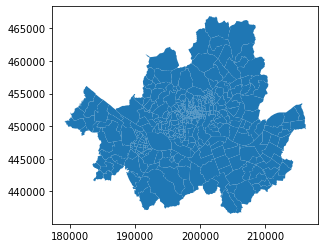

In [2]:
file="../data/shp/dong.shp"
seoul5181=gpd.read_file(file )
seoul5181.plot()

In [3]:
### 서울시 횡단보도 파일 불러오기
file2="../data/shp/crossWalk4326.shp"
crosswalk4326=gpd.read_file(file2,encoding='euc-kr')

### 서울시 신호등 파일 불러오기
file3="../data/shp/trafficLight4326.shp"
traffic_light4326=gpd.read_file(file3,encoding='euc-kr')

### 서울시 버스정류장 불러오기
file5="../data/shp/busStop4326.shp"
busstop4326=gpd.read_file(file5,encoding='euc-kr')

In [4]:
traffic_light5181=traffic_light4326.to_crs(5181)

In [5]:
traffic_light5181.dtypes


inputaddr      object
lng           float64
lat           float64
x              object
y              object
b              object
z              object
hc             object
lc             object
rc             object
bn             object
weight        float64
geometry     geometry
dtype: object

In [6]:
crosswalk5181=crosswalk4326.to_crs(5181)

In [7]:
crosswalk5181.head()

,노드링크,노드 ID,노드 유형,링크 WKT,링크 ID,링크 유형,시작노드 I,종료노드 I,링크 길이,시군구코드,시군구명,읍면동코드,읍면동명,geometry
0,NODE,152890,0.0,None,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111016400,종로6가,POINT (200749.504 452577.892)
1,NODE,132275,0.0,None,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111011400,내자동,POINT (197640.786 452736.041)
2,NODE,152891,0.0,None,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111016400,종로6가,POINT (200741.376 452571.542)
3,LINK,0,NaN,LINESTRING(126.97737650332448 37.5753884939723...,166553,1011.0,132992.0,132993.0,4.324,1111000000,종로구,1111011900,세종로,None
4,NODE,152892,0.0,None,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111016400,종로6가,POINT (200741.122 452613.452)


In [8]:
busstop5181=busstop4326.to_crs(5181)

In [9]:
busstop5181.head()

,정류소번호,정류소명,X좌표,Y좌표,weight,geometry
0,1191,종로1가,126.980187,37.570400,1,POINT (198249.673 452317.842)
1,1001,종로2가사거리,126.987750,37.569765,1,POINT (198917.788 452247.265)
2,1002,창경궁.서울대학교병원,126.996566,37.579183,1,POINT (199696.668 453292.477)
3,1003,명륜3가.성대입구,126.998340,37.582671,1,POINT (199853.385 453679.617)
4,1004,종로2가.삼일교,126.987613,37.568579,1,POINT (198905.685 452115.650)


<AxesSubplot:>

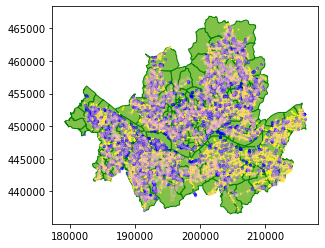

In [10]:
fig, base = plt.subplots()
seoul5181.plot(color='#81C147', edgecolor="green", ax = base)
crosswalk5181.plot(ax=base, marker='o', color='yellow', markersize=0.2)
traffic_light5181.plot(ax=base, marker='o', alpha = .5, color='blue', markersize=5)
busstop5181.plot(ax=base, marker='o', color='pink', alpha = .1, markersize=5)

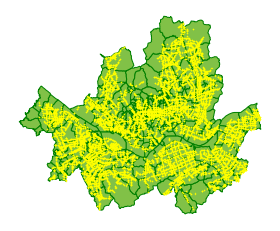

In [11]:
#횡단보도
base = seoul5181.plot(color='#81C147', edgecolor="green")
ax = crosswalk5181.plot(ax=base, marker='o', color='yellow', markersize=0.2)
ax.set_axis_off()
plt.show()

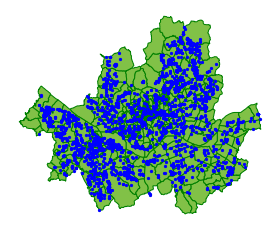

In [12]:
#신호등
base = seoul5181.plot(color='#81C147', edgecolor="green")
ax=traffic_light5181.plot(ax=base, marker='o', color='blue', markersize=5)
ax.set_axis_off()
plt.show()

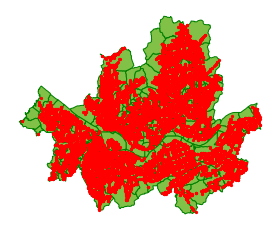

In [13]:
#버스정류장
base = seoul5181.plot(color='#81C147', edgecolor="green")
ax = busstop5181.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
plt.show()

<AxesSubplot:>

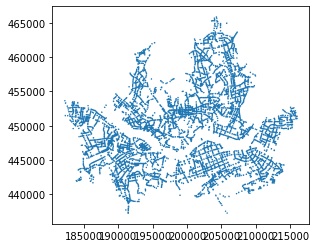

In [14]:
crosswalk5181buf = crosswalk5181.buffer(100).unary_union
df_cw = gpd.GeoDataFrame(crosswalk5181buf)
df_cw.rename(columns={0:'geometry'},inplace=True)
df_cw.set_geometry('geometry',inplace=True)
#geometry column을 해당 dataframe의 좌표 column임을 설정
df_cw.set_crs('epsg:5181',inplace=True)
df_cw.plot()

<AxesSubplot:>

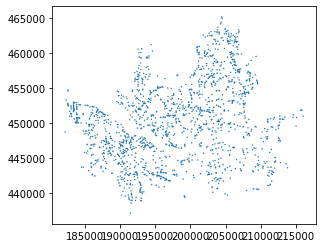

In [15]:
traffic_light5181buf = traffic_light5181.buffer(100).unary_union
df_tl = gpd.GeoDataFrame(traffic_light5181buf)
df_tl.rename(columns={0:'geometry'},inplace=True)
df_tl.set_geometry('geometry',inplace=True)
#geometry column을 해당 dataframe의 좌표 column임을 설정
df_tl.set_crs('epsg:5181',inplace=True)
df_tl.plot()

<AxesSubplot:>

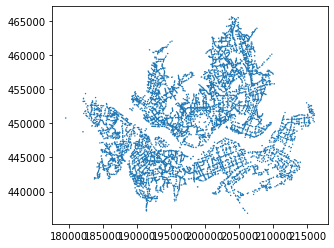

In [16]:
busstop5181buf = busstop5181.buffer(100).unary_union
df_bs = gpd.GeoDataFrame(busstop5181buf)
df_bs.rename(columns={0:'geometry'},inplace=True)
df_bs.set_geometry('geometry',inplace=True)
#geometry column을 해당 dataframe의 좌표 column임을 설정
df_bs.set_crs('epsg:5181',inplace=True)
df_bs.plot()

<AxesSubplot:>

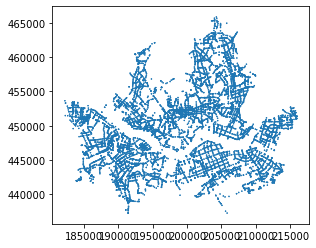

In [17]:
crosswalk5181buf = crosswalk5181.buffer(100)
crosswalk5181buf.plot()

<AxesSubplot:>

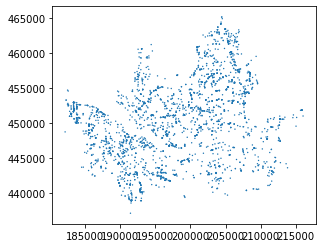

In [18]:
traffic_light5181buf = traffic_light5181.buffer(100)
traffic_light5181buf.plot()

<AxesSubplot:>

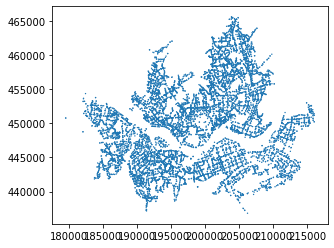

In [19]:
busstop5181buf = busstop5181.buffer(100)
busstop5181buf.plot()

In [20]:
crosswalk5181buf.to_file('../data/shp/crosswalk5181.shp', encoding='euc-kr')
traffic_light5181buf.to_file('../data/shp/trafficLight5181.shp', encoding='euc-kr')
busstop5181buf.to_file('../data/shp/busStop5181.shp', encoding='euc-kr')

C:\miniforge\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\miniforge\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\miniforge\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
